In [1]:
import scirpy as ir
import pandas as pd
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
import muon as mu

In [2]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Major cell group to color mapping (base colors)
group_base_colors = {
    "T_Cells": "red",
    "B_Cells_and_Plasma_Cells": "blue",
    "Myeloid_Cells": "green",
    "NK_Cells": "orange",
    "Stromal_NonImmune_Cells": "purple",
    "Cycling_Proliferative_Cells": "brown"
}

# Original dictionary
cell_groups = {
    "T_Cells": [
        "CD8+_(Term)Exh_T",
        "CD8+_(Pre)Exh_T",
        "CD8+_(TPEX)Exh_T",
        "CD8+_HiRib_T",
        "CD8+_Cyto_T",
        "CD4+_T",
        "CD4+_Treg",
        "γδ_T",
        "(Unconventional)T",
        "Stem/Memory_Signal_T"
    ],
    "B_Cells_and_Plasma_Cells": [
        "(Naive)_B",
        "(Early_Act)_B",
        "(HiRib)_B",
        "(Memory)_B",
        "B(Early)",
        "Plasma"
    ],
    "Myeloid_Cells": [
        "Classical_Monocytes",
        "Inflam_Mono/Neutro(TAN)",
        "M2_Macs",
        "Macs(TAM)_1",
        "Macs(TAM)_2",
        "Macs(TAM)_3",
        "Neutro",
        "Neutro(TAN)",
        "Neutro(TIN)",
        "DC(moDCs)",
        "DC(cDC1)",
        "pDCs"
    ],
    "NK_Cells": [
        "NK"
    ],
    "Stromal_NonImmune_Cells": [
        "(CAF-EMT)",
        "(TAV)"
    ],
    "Cycling_Proliferative_Cells": [
        "Proli"
    ]
}

# Function to generate variations of a base color
def generate_color_variations(base_color, n):
    base_rgb = mcolors.to_rgb(base_color)
    return [
        mcolors.to_hex([(1 - i / (n + 1)) * c + (i / (n + 1)) * 1.0 for c in base_rgb])
        for i in range(1, n + 1)
    ]

# Assign colors to each element
cell_colors = {}
for group, cells in cell_groups.items():
    base_color = group_base_colors[group]
    variations = generate_color_variations(base_color, len(cells))
    for cell, color in zip(cells, variations):
        cell_colors[cell] = color

# Optional: Display or return the cell_colors dictionary
for cell, color in cell_colors.items():
    print(f"{cell}: '{color}'")

CD8+_(Term)Exh_T: '#ff1717'
CD8+_(Pre)Exh_T: '#ff2e2e'
CD8+_(TPEX)Exh_T: '#ff4646'
CD8+_HiRib_T: '#ff5d5d'
CD8+_Cyto_T: '#ff7474'
CD4+_T: '#ff8b8b'
CD4+_Treg: '#ffa2a2'
γδ_T: '#ffb9b9'
(Unconventional)T: '#ffd1d1'
Stem/Memory_Signal_T: '#ffe8e8'
(Naive)_B: '#2424ff'
(Early_Act)_B: '#4949ff'
(HiRib)_B: '#6d6dff'
(Memory)_B: '#9292ff'
B(Early): '#b6b6ff'
Plasma: '#dbdbff'
Classical_Monocytes: '#148a14'
Inflam_Mono/Neutro(TAN): '#279427'
M2_Macs: '#3b9d3b'
Macs(TAM)_1: '#4ea74e'
Macs(TAM)_2: '#62b162'
Macs(TAM)_3: '#76bb76'
Neutro: '#89c489'
Neutro(TAN): '#9dce9d'
Neutro(TIN): '#b1d8b1'
DC(moDCs): '#c4e2c4'
DC(cDC1): '#d8ebd8'
pDCs: '#ebf5eb'
NK: '#ffd280'
(CAF-EMT): '#aa55aa'
(TAV): '#d5aad5'
Proli: '#d29494'


In [3]:
import matplotlib.colors as mcolors

# Split T cells into CD4+ and CD8+
cell_groups = {
    "T_Cells_CD4": [
        "CD4+_T",
        "CD4+_Treg",
        "Stem/Memory_Signal_T"
    ],
    "T_Cells_CD8": [
        "CD8+_(Term)Exh_T",
        "CD8+_(Pre)Exh_T",
        "CD8+_(TPEX)Exh_T",
        "CD8+_HiRib_T",
        "CD8+_Cyto_T"
    ],
    "B_Cells_and_Plasma_Cells": [
        "(Naive)_B",
        "(Early_Act)_B",
        "(HiRib)_B",
        "(Memory)_B",
        "B(Early)",
        "Plasma"
    ],
    "Myeloid_Cells": [
        "Classical_Monocytes",
        "M2_Macs",
        "Macs(TAM)_1",
        "Macs(TAM)_2",
        "Macs(TAM)_3",
    ],
    "Neutros" : [
                "Neutro",
        "Inflam_Mono/Neutro(TAN)",
        "Neutro(TAN)",
        "Neutro(TIN)",
    ],
    "Dendritic" : [
                "DC(moDCs)",
        "DC(cDC1)",
        "pDCs"
    ],
    "NK_Cells": [
        "NK"
    ],
    "Stromal_NonImmune_Cells": [
        "(CAF-EMT)",
        "(TAV)"
    ],
    "Cycling_Proliferative_Cells": [
        "Proli"
    ],
    "Unconventional_T": [
        "γδ_T",
        "(Unconventional)T"
    ]
}

# Assign base colors
group_base_colors = {
    "T_Cells_CD4": "blueviolet",
    "T_Cells_CD8": "crimson",
    "B_Cells_and_Plasma_Cells": "navy",
    "Myeloid_Cells": "darkgreen",
    "Neutros": 'orchid',
    "Dendritic":'greenyellow',
    "NK_Cells": "darkorange",
    "Stromal_NonImmune_Cells": "saddlebrown",
    "Cycling_Proliferative_Cells": "dimgray",
    "Unconventional_T": "darkred"
}


def smooth_dark_to_transparent_light(color, n, dark_factor=0.7, alpha_end=0.4):
    """
    Generate n colors starting from a slightly darkened base color
    and ending in a bright, transparent version of the base color.
    
    - color: base CSS4 color name or hex
    - n: total number of color variations
    - dark_factor: 0–1, how dark the starting color is (1 = original, 0 = black)
    - alpha_end: final alpha (transparency), 0 = fully transparent, 1 = opaque
    """
    base_rgb = mcolors.to_rgb(color)
    colors = []

    for i in range(n):
        t = i / (n+1)  # normalized position

        # Blend toward white for brightness
        rgb = [(1 - t) * (dark_factor * c) + t * 1 for c in base_rgb]

        # Linearly interpolate alpha
        alpha = (1 - t) * 1.0 + t * alpha_end

        # Convert to hex with alpha
        colors.append(mcolors.to_hex(rgb + [alpha], keep_alpha=True))

    return colors
# Generate color mappings
cell_colors = {}
for group, cells in cell_groups.items():
    base_color = group_base_colors[group]
    variations = smooth_dark_to_transparent_light(base_color, len(cells),  dark_factor=0.75, alpha_end=0.3)
    for cell, color in zip(cells, variations):
        cell_colors[cell] = color

# Preview
for cell, color in cell_colors.items():
    print(f"{cell}: '{color}'")


CD4+_T: '#6820aaff'
CD4+_Treg: '#8d58bfd2'
Stem/Memory_Signal_T: '#b390d4a6'
CD8+_(Term)Exh_T: '#a50f2dff'
CD8+_(Pre)Exh_T: '#b43750e1'
CD8+_(TPEX)Exh_T: '#c35f73c4'
CD8+_HiRib_T: '#d28796a6'
CD8+_Cyto_T: '#e1afb988'
(Naive)_B: '#000060ff'
(Early_Act)_B: '#242477e6'
(HiRib)_B: '#49498dcc'
(Memory)_B: '#6d6da4b2'
B(Early): '#9292bb99'
Plasma: '#b6b6d280'
Classical_Monocytes: '#004b00ff'
M2_Macs: '#2a692ae1'
Macs(TAM)_1: '#558755c4'
Macs(TAM)_2: '#80a580a6'
Macs(TAM)_3: '#aac3aa88'
Neutro: '#a354a0ff'
Inflam_Mono/Neutro(TAN): '#b676b3db'
Neutro(TAN): '#c898c6b8'
Neutro(TIN): '#dabbd994'
DC(moDCs): '#82bf23ff'
DC(cDC1): '#a1cf5ad2'
pDCs: '#c0df91a6'
NK: '#bf6900ff'
(CAF-EMT): '#68340eff'
(TAV): '#9b785ec4'
Proli: '#4f4f4fff'
γδ_T: '#680000ff'
(Unconventional)T: '#9b5555c4'


In [4]:
cell_colors = {'CD4+_T': '#6820aaff',
 'CD4+_Treg': '#8d58bfd2',
 'Stem/Memory_Signal_T': '#b390d4a6',
 'CD8+_(Term)Exh_T': '#a50f2dff',
 'CD8+_(Pre)Exh_T': '#b43750e1',
 'CD8+_(TPEX)Exh_T': '#c35f73c4',
 'CD8+_HiRib_T': '#d28796a6',
 'CD8+_Cyto_T': '#e1afb988',
 '(Naive)_B': '#000060ff',
 '(Early_Act)_B': '#242477e6',
 '(HiRib)_B': '#49498dcc',
 '(Memory)_B': '#6d6da4b2',
 'B(Early)': '#9292bb99',
 'Plasma': '#b6b6d280',
 'Classical_Monocytes': '#004b00ff',
 'M2_Macs': '#2a692ae1',
 'Macs(TAM)_1': '#558755c4',
 'Macs(TAM)_2': '#80a580a6',
 'Macs(TAM)_3': '#aac3aa88',
 'Neutro': '#a354a0ff',
 'Inflam_Mono/Neutro(TAN)': '#b676b3db',
 'Neutro(TAN)': '#c898c6b8',
 'Neutro(TIN)': '#dabbd994',
 'DC(moDCs)': '#82bf23ff',
 'DC(cDC1)': '#a1cf5ad2',
 'pDCs': '#c0df91a6',
 'NK': '#bf6900ff',
 '(CAF-EMT)': '#68340eff',
 '(TAV)': '#9b785ec4',
 'Proli': '#4f4f4fff',
 'γδ_T': '#680000ff',
 '(Unconventional)T': '#9b5555c4'}

palette_samples = {'S741': '#1f77b4',
 'S742': '#ff7f0e',
 'S743': '#2ca02c',
 'S744': '#d62728',
 'S745': '#9467bd',
 'S746': '#8c564b',
 'S760': '#e377c2',
 'S761': '#7f7f7f'}

In [ ]:
# Flatten the ordered list of cell types from your dictionary
ordered_cell_types = []
for group in [
    "T_Cells_CD4", "T_Cells_CD8", "Cycling_Proliferative_Cells", "Unconventional_T","B_Cells_and_Plasma_Cells", "Myeloid_Cells",'Dendritic','Neutros',
    "NK_Cells", "Stromal_NonImmune_Cells", 
]:
    ordered_cell_types.extend(cell_groups[group])
ordered_cell_types

['CD4+_T',
 'CD4+_Treg',
 'Stem/Memory_Signal_T',
 'CD8+_(Term)Exh_T',
 'CD8+_(Pre)Exh_T',
 'CD8+_(TPEX)Exh_T',
 'CD8+_HiRib_T',
 'CD8+_Cyto_T',
 'Proli',
 'γδ_T',
 '(Unconventional)T',
 '(Naive)_B',
 '(Early_Act)_B',
 '(HiRib)_B',
 '(Memory)_B',
 'B(Early)',
 'Plasma',
 'Classical_Monocytes',
 'M2_Macs',
 'Macs(TAM)_1',
 'Macs(TAM)_2',
 'Macs(TAM)_3',
 'DC(moDCs)',
 'DC(cDC1)',
 'pDCs',
 'Neutro',
 'Inflam_Mono/Neutro(TAN)',
 'Neutro(TAN)',
 'Neutro(TIN)',
 'NK',
 '(CAF-EMT)',
 '(TAV)']

In [ ]:
adata = sc.read('../objects/adata_annotated.h5ad', compression='gzip')

In [ ]:
adata.obs['Annotation'] = pd.Categorical(adata.obs['Annotation'], categories=ordered_cell_types, ordered=True)


In [ ]:
adata

AnnData object with n_obs × n_vars = 71977 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'lo

<Axes: title={'center': 'Annotation'}, xlabel='UMAP1', ylabel='UMAP2'>

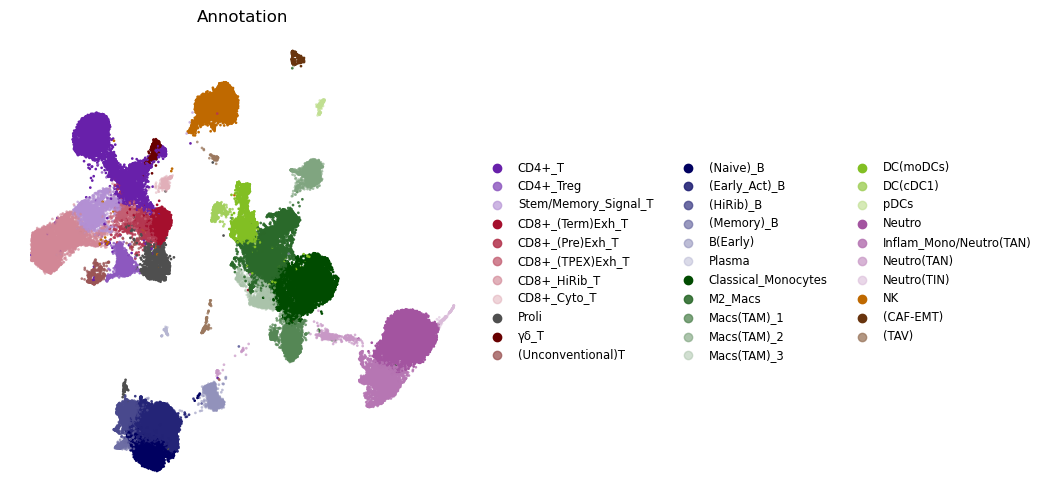

In [ ]:
rcParams['figure.figsize'] = (6,6)

sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,legend_fontsize='small', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False, palette = cell_colors
)

# PLOTTING FINAL PAPER PLOTS

In [18]:
cell_colors = {
 'CD4+_T': '#6820aaff',
 'CD4+_Treg': '#8d58bfd2',
 'Stem/Memory_Signal_T': '#b390d4a6',
 'CD8+_(Term)Exh_T': '#a50f2dff',
 'CD8+_(Pre)Exh_T': '#b43750e1',
 'CD8+_(TPEX)Exh_T': '#c35f73c4',
 'CD8+_HiRib_T': '#d28796a6',
 'CD8+_Cyto_T': '#e1afb988',
  'γδ_T': '#680000ff',
 '(Unconventional)T': '#9b5555c4',
 'Proli': '#4f4f4fff',
 'NK': '#bf6900ff',
 '(Naive)_B': '#000060ff',
 '(Early_Act)_B': '#242477e6',
 '(HiRib)_B': '#49498dcc',
 '(Memory)_B': '#6d6da4b2',
 'B(Early)': '#9292bb99',
 'Plasma': '#b6b6d280',
 'Classical_Monocytes': '#004b00ff',
 'M2_Macs': '#2a692ae1',
 'Macs(TAM)_1': '#558755c4',
 'Macs(TAM)_2': '#80a580a6',
 'Macs(TAM)_3': '#aac3aa88',
 'Neutro': '#a354a0ff',
 'Inflam_Mono/Neutro(TAN)': '#b676b3db',
 'Neutro(TAN)': '#c898c6b8',
 'Neutro(TIN)': '#dabbd994',
 'DC(moDCs)': '#82bf23ff',
 'DC(cDC1)': '#a1cf5ad2',
 'pDCs': '#c0df91a6',
 '(CAF-EMT)': '#68340eff',
 '(TAV)': '#9b785ec4',
}

cell_groups = {
    "CD4": [
        "CD4+_T",
        "CD4+_Treg",
        "Stem/Memory_Signal_T"
    ],
    "CD8": [
        "CD8+_(Term)Exh_T",
        "CD8+_(Pre)Exh_T",
        "CD8+_(TPEX)Exh_T",
        "CD8+_HiRib_T",
        "CD8+_Cyto_T"
    ],
    "Proliferative": [
        "Proli"
    ],
    "Unconventional_T": [
        "γδ_T",
        "(Unconventional)T"
    ],
    "B_Cells": [
        "(Naive)_B",
        "(Early_Act)_B",
        "(HiRib)_B",
        "(Memory)_B",
        "B(Early)",
        "Plasma"
    ],
    "Myeloid": [
        "Classical_Monocytes",
        "M2_Macs",
        "Macs(TAM)_1",
        "Macs(TAM)_2",
        "Macs(TAM)_3",
    ],
    "Neutrophils" : [
                "Neutro",
        "Inflam_Mono/Neutro(TAN)",
        "Neutro(TAN)",
        "Neutro(TIN)",
    ],
    "Dendritic" : [
                "DC(moDCs)",
        "DC(cDC1)",
        "pDCs"
    ],
    "NK": [
        "NK"
    ],
    "Stromal": [
        "(CAF-EMT)",
        "(TAV)"
    ]
}

# Assign base colors
group_base_colors = {
    "CD4": "blueviolet",
    "CD8": "crimson",
    "B_Cells": "navy",
    "Myeloid": "darkgreen",
    "Neutrophils": 'orchid',
    "Dendritic":'greenyellow',
    "NK": "darkorange",
    "Stromal": "saddlebrown",
    "Proliferative": "dimgray",
    "Unconventional_T": "darkred"
}
group_base_colors_plot = {
    "CD4": "blueviolet",
    "CD8": "crimson",
    "B_Cells": "navy",
    "Myeloid": "darkgreen",
    "Neutrophils": 'orchid',
    "Dendritic":'#aeea00',
    "NK": "darkorange",
    "Stromal": "saddlebrown",
    "Proliferative": "dimgray",
    "Unconventional_T": "darkred"
}
palette_samples = {
'S760_Veh': '#8c564b',
'S741_Veh': '#1f77b4',
'S743_Veh': '#e377c2',
'S744_Veh': '#d62728',
'S761_NMDi': '#7f7f7f',
'S742_NMDi': '#2ca02c',
'S746_NMDi': '#ff7f0e',
'S745_NMDi': '#9467bd',
}

palette_response = {'Untreated':'#7f7f7f',  'Bad':'#d62728','Good': '#1f77b4', 'Very_Good':'#2ca02c'}

import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
import pandas as pd
import scirpy as ir

In [19]:
adata = sc.read('../objects/adata_metadata.h5ad', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [20]:
adata.obs['sample_state']= adata.obs['sample_state'].cat.reorder_categories(palette_samples.keys())
adata.obs['Response']= adata.obs['Response'].cat.reorder_categories(palette_response.keys())
adata.obs['Annotation']= adata.obs['Annotation'].cat.reorder_categories(cell_colors.keys())


In [4]:
adata.obs['Annotation_Broad'] = np.nan
for ct in group_base_colors.keys():
    adata.obs.loc[adata.obs['Annotation'].isin(cell_groups[ct]),'Annotation_Broad'] = ct

/tmp/ipykernel_30858/3074667415.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CD4' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adata.obs.loc[adata.obs['Annotation'].isin(cell_groups[ct]),'Annotation_Broad'] = ct


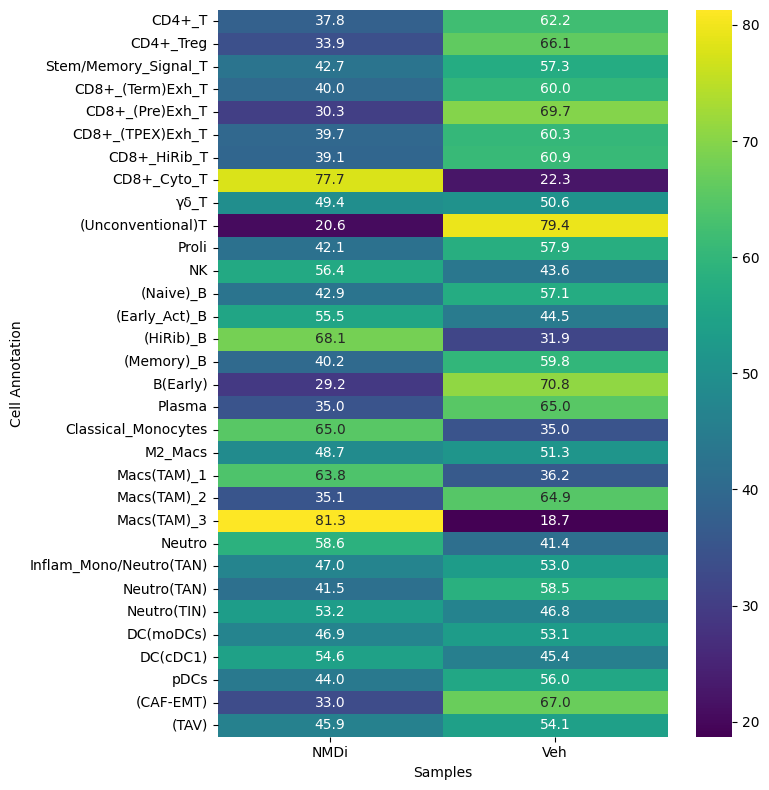

In [10]:
splitby='Treatment'
qc_ct = pd.crosstab(adata.obs['Annotation'], adata.obs[splitby])

# Optional: normalize by row (i.e., percentage within each annotation)
qc_ct_pct = qc_ct.div(qc_ct.sum(axis=1), axis=0) * 100

# # Plot heatmap of absolute counts
# plt.figure(figsize=(8, 8))
# sns.heatmap(qc_ct, annot=True, fmt="d", cmap="Blues")
# plt.title("Treatment by cell-type(Counts)")
# plt.ylabel("Cell Annotation")
# plt.xlabel("QC Failure Reason")
# plt.tight_layout()
# plt.savefig('../figures/QC_pass_Persample.png', bbox_inches='tight', dpi=400)
# plt.show()

# Plot heatmap of percentages
plt.figure(figsize=(8, 8))
sns.heatmap(qc_ct_pct, annot=True, fmt=".1f", cmap="viridis")
# plt.title("Treatment by cell-type(Counts)")
plt.ylabel("Cell Annotation")
plt.xlabel("Samples")
plt.tight_layout()
plt.savefig(f'../../figures/Percentage_Annotation_{splitby}.png', bbox_inches='tight', dpi=400)
plt.show()

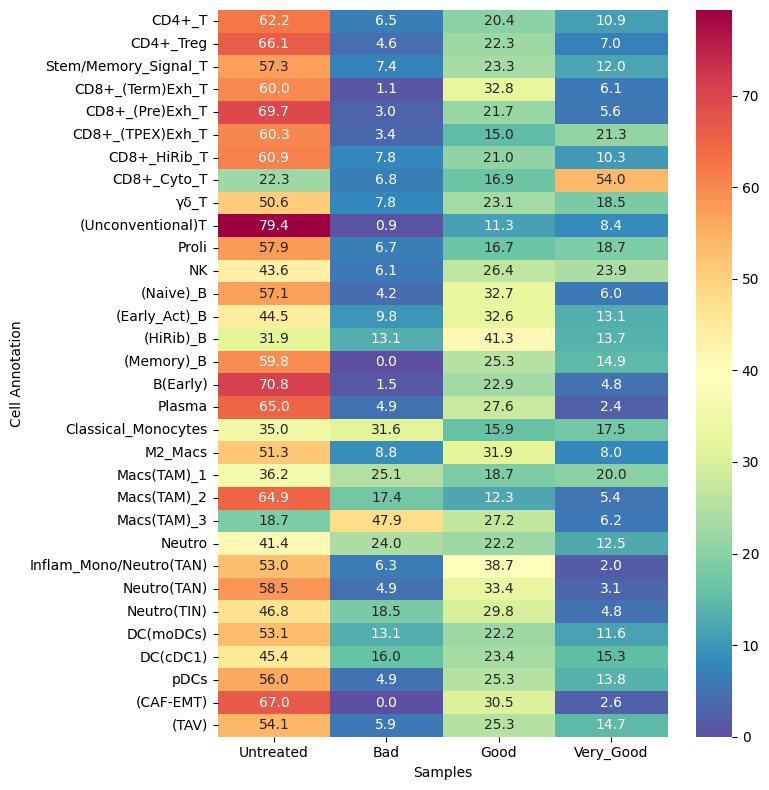

In [11]:
splitby='Response'
qc_ct = pd.crosstab(adata.obs['Annotation'], adata.obs[splitby])

# Optional: normalize by row (i.e., percentage within each annotation)
qc_ct_pct = qc_ct.div(qc_ct.sum(axis=1), axis=0) * 100

# # Plot heatmap of absolute counts
# plt.figure(figsize=(8, 8))
# sns.heatmap(qc_ct, annot=True, fmt="d", cmap="Blues")
# plt.title("Treatment by cell-type(Counts)")
# plt.ylabel("Cell Annotation")
# plt.xlabel("QC Failure Reason")
# plt.tight_layout()
# plt.savefig('../figures/QC_pass_Persample.png', bbox_inches='tight', dpi=400)
# plt.show()

# Plot heatmap of percentages
plt.figure(figsize=(8, 8))
sns.heatmap(qc_ct_pct, annot=True, fmt=".1f", cmap="Spectral_r")
# plt.title("Treatment by cell-type(Counts)")
plt.ylabel("Cell Annotation")
plt.xlabel("Samples")
plt.tight_layout()
plt.savefig(f'../../figures/Percentage_Annotation_{splitby}_SUM.png', bbox_inches='tight', dpi=400)
plt.show()

/tmp/ipykernel_6112/1962425172.py:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()
/tmp/ipykernel_6112/1962425172.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()


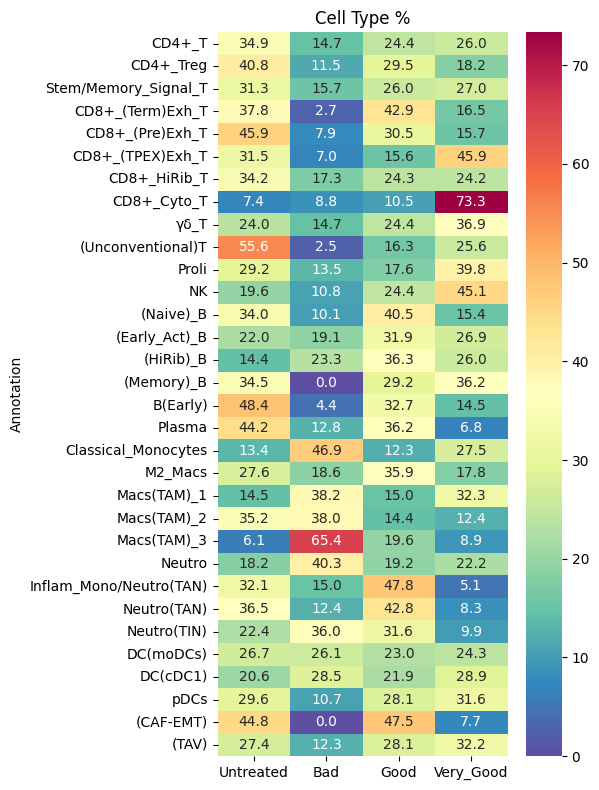

In [12]:
celltype_col = 'Annotation'
sample_col = 'sample_state'
condition_col = 'Response'  # Or 'sample_state'

# Step 1: Cross-tab counts per (celltype x sample)
ct_sample = pd.crosstab(adata.obs[celltype_col], adata.obs[sample_col])

# Step 2: Normalize *within each sample* (column-wise) → celltype percentages per sample
ct_sample_pct = ct_sample.div(ct_sample.sum(axis=0), axis=1) * 100

# Step 3: Map each sample to its condition
sample_to_condition = adata.obs[[sample_col, condition_col]].drop_duplicates().set_index(sample_col)[condition_col]

# Step 4: Replace sample columns with condition labels
ct_sample_pct.columns = sample_to_condition[ct_sample_pct.columns].values

# Step 5: Group columns by condition, take the mean across samples per condition
ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()

# Step 6: Normalize each row (i.e., per cell type) so the condition percentages sum to 100%
ct_condition_pct_norm = ct_condition_pct.div(ct_condition_pct.sum(axis=1), axis=0) * 100

# Step 7: Plot
plt.figure(figsize=(6, 8))
sns.heatmap(ct_condition_pct_norm, annot=True, fmt=".1f", cmap="Spectral_r")
# plt.ylabel("Cell Type")
# plt.xlabel("Condition")
plt.title("Cell Type %")
plt.tight_layout()
plt.savefig(f'../../figures/Paper/Percentage_CellType_Distribution_by_{condition_col}.png', dpi=400, bbox_inches='tight')
plt.show()



/tmp/ipykernel_6112/3106699757.py:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()
/tmp/ipykernel_6112/3106699757.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()


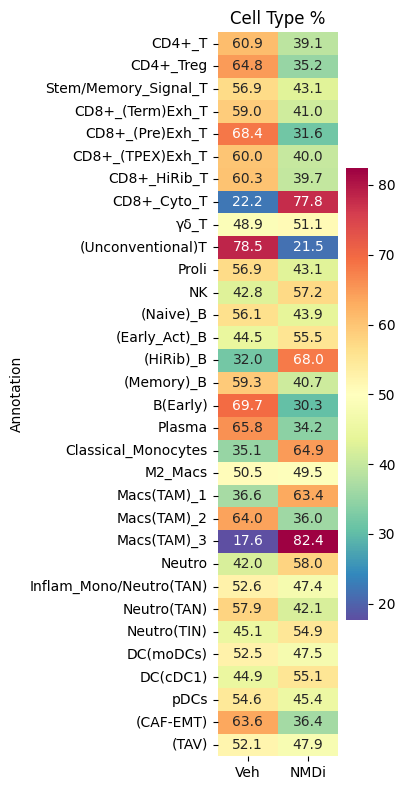

In [13]:
celltype_col = 'Annotation'
sample_col = 'sample_state'
condition_col = 'Treatment'  # Or 'sample_state'
adata.obs['Treatment'] = adata.obs['Treatment'].cat.reorder_categories(['Veh','NMDi'])
# Step 1: Cross-tab counts per (celltype x sample)
ct_sample = pd.crosstab(adata.obs[celltype_col], adata.obs[sample_col])

# Step 2: Normalize *within each sample* (column-wise) → celltype percentages per sample
ct_sample_pct = ct_sample.div(ct_sample.sum(axis=0), axis=1) * 100

# Step 3: Map each sample to its condition
sample_to_condition = adata.obs[[sample_col, condition_col]].drop_duplicates().set_index(sample_col)[condition_col]

# Step 4: Replace sample columns with condition labels
ct_sample_pct.columns = sample_to_condition[ct_sample_pct.columns].values

# Step 5: Group columns by condition, take the mean across samples per condition
ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()

# Step 6: Normalize each row (i.e., per cell type) so the condition percentages sum to 100%
ct_condition_pct_norm = ct_condition_pct.div(ct_condition_pct.sum(axis=1), axis=0) * 100

# Step 7: Plot
plt.figure(figsize=(4, 8))
sns.heatmap(ct_condition_pct_norm, annot=True, fmt=".1f", cmap="Spectral_r")
# plt.ylabel("Cell Type")
# plt.xlabel("Condition")
plt.title("Cell Type %")
plt.tight_layout()
plt.savefig(f'../../figures/Paper/Percentage_CellType_Distribution_by_{condition_col}.png', dpi=400, bbox_inches='tight')
plt.savefig(f'../../figures/Paper/Percentage_CellType_Distribution_by_{condition_col}.pdf', dpi=400, bbox_inches='tight')

plt.show()



In [14]:
ct_sample

sample_state,S760_Veh,S741_Veh,S743_Veh,S744_Veh,S761_NMDi,S742_NMDi,S746_NMDi,S745_NMDi
Annotation,,,,,,,,
CD4+_T,915,1685,1175,960,496,871,679,832
CD4+_Treg,189,316,195,211,64,184,123,96
Stem/Memory_Signal_T,385,331,371,334,183,285,293,298
CD8+_(Term)Exh_T,64,385,207,412,19,227,357,109
CD8+_(Pre)Exh_T,42,220,214,159,27,105,93,51
CD8+_(TPEX)Exh_T,48,65,150,71,19,30,53,118
CD8+_HiRib_T,762,1032,1045,800,466,563,693,615
CD8+_Cyto_T,16,17,30,19,25,9,53,198
γδ_T,38,72,51,80,37,90,20,88


In [15]:
sample_to_condition

sample_state
S744_Veh      Veh
S742_NMDi    NMDi
S746_NMDi    NMDi
S761_NMDi    NMDi
S741_Veh      Veh
S743_Veh      Veh
S745_NMDi    NMDi
S760_Veh      Veh
Name: Treatment, dtype: category
Categories (2, object): ['Veh', 'NMDi']

/tmp/ipykernel_6112/1179380401.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_.obs['Treatment']= adata_.obs['Treatment'].tolist()
/tmp/ipykernel_6112/1179380401.py:23: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()
/tmp/ipykernel_6112/1179380401.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()


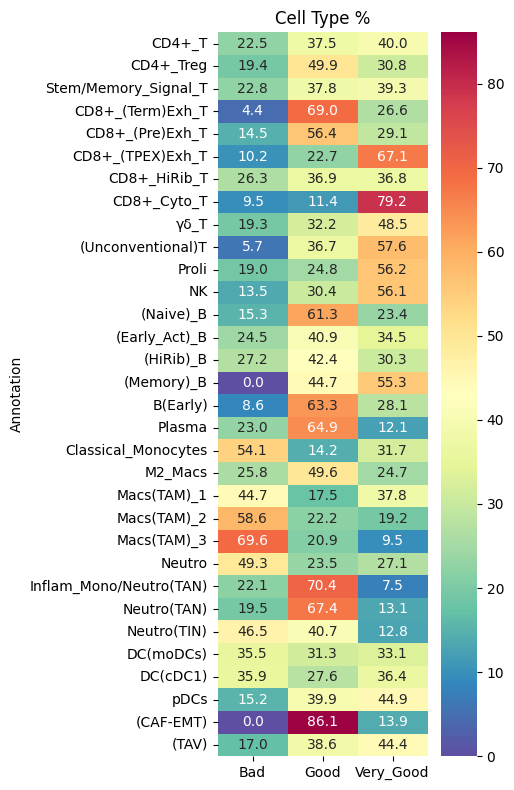

In [16]:
celltype_col = 'Annotation'
sample_col = 'sample_state'
condition_col = 'Response'  # Or 'sample_state'

rcParams['figure.figsize'] = (5,6)


adata_ =adata[adata.obs['Treatment'].isin(['NMDi'])]
adata_.obs['Treatment']= adata_.obs['Treatment'].tolist()
# Step 1: Cross-tab counts per (celltype x sample)
ct_sample = pd.crosstab(adata_.obs[celltype_col], adata.obs[sample_col])

# Step 2: Normalize *within each sample* (column-wise) → celltype percentages per sample
ct_sample_pct = ct_sample.div(ct_sample.sum(axis=0), axis=1) * 100

# Step 3: Map each sample to its condition
sample_to_condition = adata_.obs[[sample_col, condition_col]].drop_duplicates().set_index(sample_col)[condition_col]

# Step 4: Replace sample columns with condition labels
ct_sample_pct.columns = sample_to_condition[ct_sample_pct.columns].values

# Step 5: Group columns by condition, take the mean across samples per condition
ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()

# Step 6: Normalize each row (i.e., per cell type) so the condition percentages sum to 100%
ct_condition_pct_norm = ct_condition_pct.div(ct_condition_pct.sum(axis=1), axis=0) * 100

# Step 7: Plot
plt.figure(figsize=(5, 8))
sns.heatmap(ct_condition_pct_norm, annot=True, fmt=".1f", cmap="Spectral_r")
# plt.ylabel("Cell Type")
# plt.xlabel("Condition")
plt.title("Cell Type %")
plt.tight_layout()
plt.savefig(f'../../figures/Paper/Percentage_CellType_Distribution_by_{condition_col}_NMDi_SUBSET.png', dpi=400, bbox_inches='tight')
plt.savefig(f'../../figures/Paper/Percentage_CellType_Distribution_by_{condition_col}_NMDi_SUBSET.pdf', dpi=400, bbox_inches='tight')

plt.show()



/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(

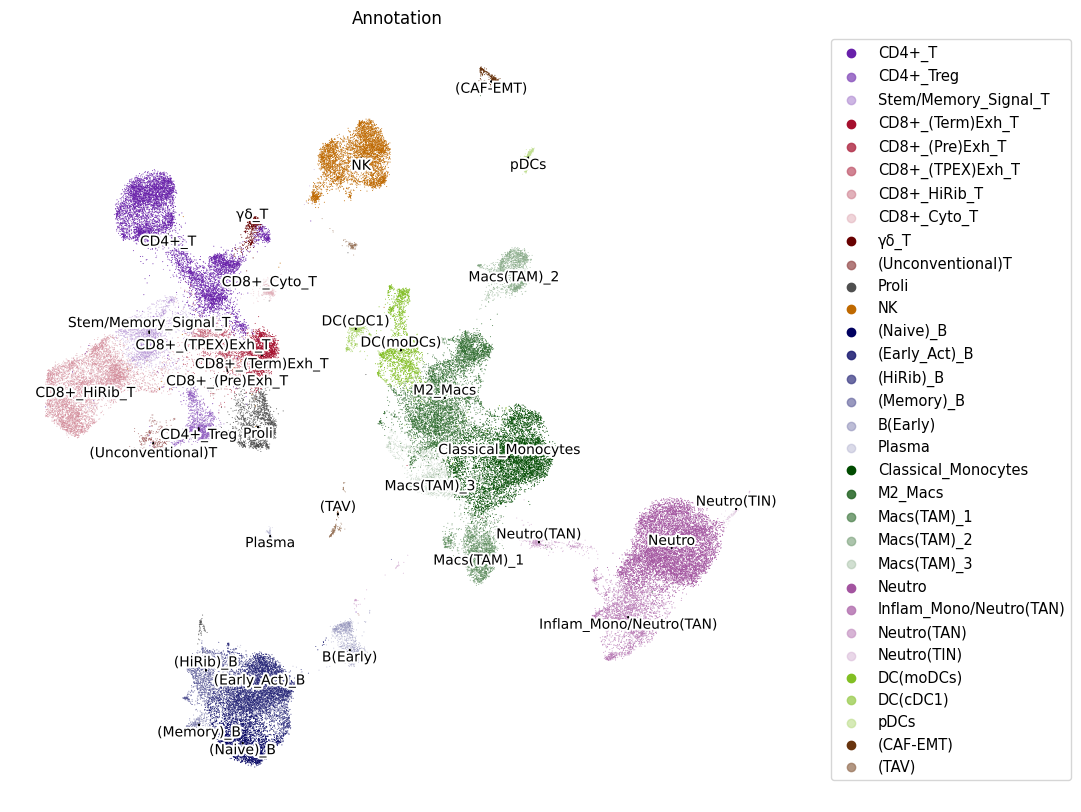

In [17]:

umap_df = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
umap_df['cluster'] = adata.obs['Annotation'].values


rcParams['figure.figsize'] = (10,10)

ax = sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,
    size=0,ncols=2, vmax='p99', show=False, frameon=False, palette=cell_colors
)

legend = ax.get_legend()
if legend:
    # Modify legend properties
    handles, labels = ax.get_legend_handles_labels()

    # Customize the legend: position, columns, and title
    legend = ax.legend(
        handles, labels,
        loc='upper left',        # Position: 'upper left', 'lower right', etc.
        bbox_to_anchor=(1.05, 1.0),# Fine-tune position outside plot
        ncol=1,                  # Number of columns
        fontsize=10.5
    )

sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,
    size=2,ncols=2, vmax='p99',ax=ax, show=False, frameon=False, legend_loc=None, legend_fontoutline=1.5, legend_fontsize=6
)

import matplotlib.patheffects as path_effects
from adjustText import adjust_text
texts = []

for group, coords in umap_df.groupby('cluster')[['UMAP1', 'UMAP2']].median().iterrows():
    text = plt.text(
        coords['UMAP1'], coords['UMAP2'],
        str(group),
        fontsize=10, color='Black', weight='normal',ha='center', va='center'
    )
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='white'),
        path_effects.Normal()
    ])
    texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), only_move='y')

plt.savefig('../../figures/Paper/Umap_Ann.png', bbox_inches='tight', dpi=400)
plt.savefig('../../figures/Paper/Umap_Ann.pdf', bbox_inches='tight', dpi=400)

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


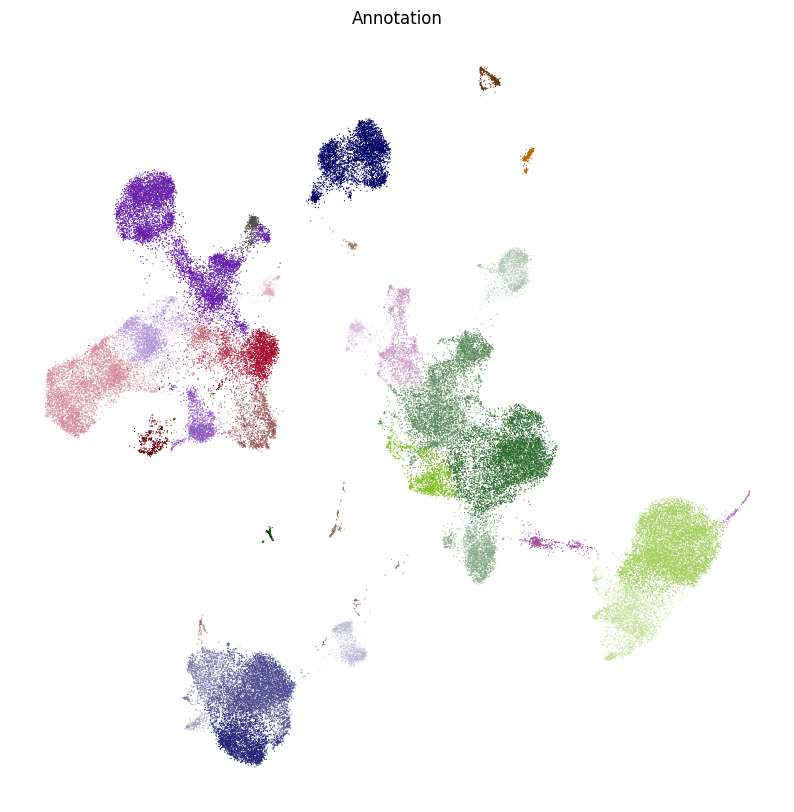

In [21]:

umap_df = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
umap_df['cluster'] = adata.obs['Annotation'].values


rcParams['figure.figsize'] = (10,10)

# ax = sc.pl.umap(
#     adata,
#     color=['Annotation'],
#     # increase horizontal space between panels
#     wspace=0.5,
#     size=0,ncols=2, vmax='p99', show=False, frameon=False, palette=cell_colors
# )

# legend = ax.get_legend()
# if legend:
#     # Modify legend properties
#     handles, labels = ax.get_legend_handles_labels()

#     # Customize the legend: position, columns, and title
#     legend = ax.legend(
#         handles, labels,
#         loc='upper left',        # Position: 'upper left', 'lower right', etc.
#         bbox_to_anchor=(1.05, 1.0),# Fine-tune position outside plot
#         ncol=1,                  # Number of columns
#         fontsize=10.5
#     )

sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,ncols=2, vmax='p99', show=False, frameon=False, legend_loc=None, legend_fontoutline=1.5, legend_fontsize=6
)

# import matplotlib.patheffects as path_effects
# from adjustText import adjust_text
# texts = []

# for group, coords in umap_df.groupby('cluster')[['UMAP1', 'UMAP2']].median().iterrows():
#     text = plt.text(
#         coords['UMAP1'], coords['UMAP2'],
#         str(group),
#         fontsize=10, color='Black', weight='normal',ha='center', va='center'
#     )
#     text.set_path_effects([
#         path_effects.Stroke(linewidth=3, foreground='white'),
#         path_effects.Normal()
#     ])
#     texts.append(text)
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), only_move='y')

plt.savefig('../../figures/Paper/Umap_Ann_No_Legend.png', bbox_inches='tight', dpi=400)
plt.savefig('../../figures/Paper/Umap_Ann_No_Legend.pdf', bbox_inches='tight', dpi=400)

In [18]:
adata.obs['Annotation_Broad'] = np.nan
for ct in group_base_colors.keys():
    adata.obs.loc[adata.obs['Annotation'].isin(cell_groups[ct]),'Annotation_Broad'] = ct
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["T_Cells_CD4"]),'Annotation_Broad'] = 'CD4'
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["Cycling_Proliferative_Cells"]),'Annotation_Broad'] = 'Proliferative'
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["Unconventional_T"]),'Annotation_Broad'] = 'γδ_Unconventional'
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["B_Cells_and_Plasma_Cells"]),'Annotation_Broad'] = 'B'
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["Myeloid_Cells"]),'Annotation_Broad'] = 'Myeloids'
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["Myeloid_Cells"]),'Annotation_Broad'] = 'Myeloids'
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["Myeloid_Cells"]),'Annotation_Broad'] = 'Myeloids'
# adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["Myeloid_Cells"]),'Annotation_Broad'] = 'Myeloids'

/tmp/ipykernel_6112/1435462506.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CD4' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adata.obs.loc[adata.obs['Annotation'].isin(cell_groups[ct]),'Annotation_Broad'] = ct


In [21]:
adata.obs['Annotation_Broad'] = adata.obs['Annotation_Broad'].astype('category')
adata.obs['Annotation_Broad'] = adata.obs['Annotation_Broad'].cat.reorder_categories(cell_groups.keys())

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


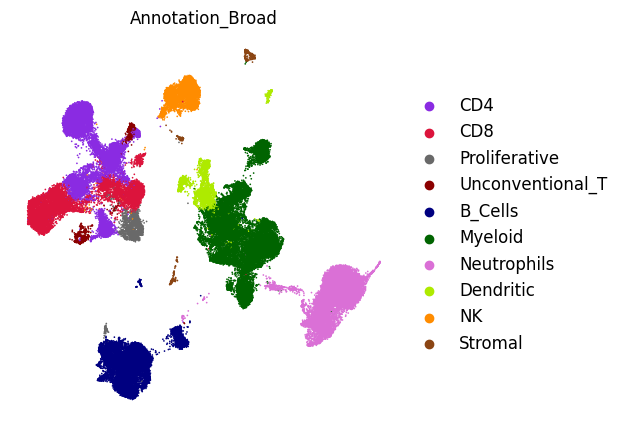

In [22]:
rcParams['figure.figsize'] = (5,5)

sc.pl.umap(
    adata,
    color=['Annotation_Broad'],
    # increase horizontal space between panels
    wspace=0.5,
    size=6,ncols=2, vmax='p99', show=False, frameon=False,legend_fontoutline=1.5, legend_fontsize=12,legend_fontweight='bold', palette=group_base_colors_plot)

plt.savefig('../../figures/Paper/Umap_Ann_Broad_Legend_out.png', bbox_inches='tight', dpi=400)
plt.savefig('../../figures/Paper/Umap_Ann_Broad_Legend_out.pdf', bbox_inches='tight', dpi=400)

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


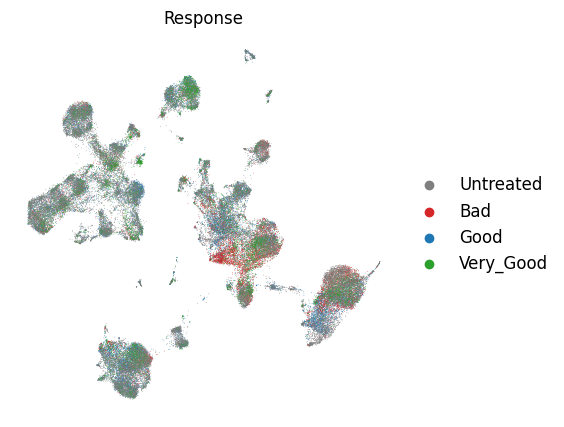

In [23]:
sc.pl.umap(
    adata,
    color=['Response'],
    # increase horizontal space between panels
    wspace=0.5,
    size=1,ncols=2, vmax='p99', show=False, frameon=False,  legend_fontoutline=2.5, legend_fontsize=12, palette= palette_response
)
plt.savefig(f'../../figures/Paper/UMAP_response.png', bbox_inches='tight', dpi=400)
plt.savefig(f'../../figures/Paper/UMAP_response.pdf', bbox_inches='tight', dpi=400)


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


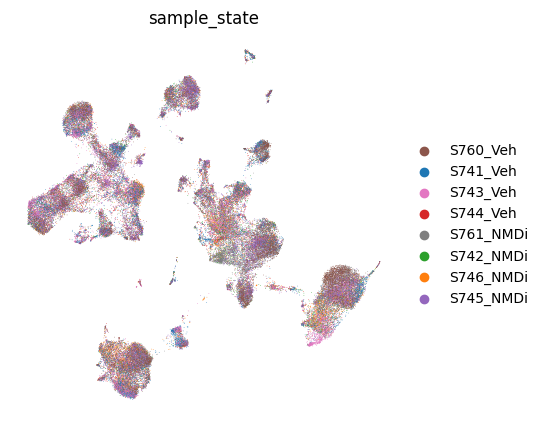

In [24]:
sc.pl.umap(
    adata,
    color=['sample_state'],
    # increase horizontal space between panels
    wspace=0.5,
    size=1,ncols=2, vmax='p99', show=False, frameon=False,  legend_fontoutline=2.5, legend_fontsize=10, palette= palette_samples
)
plt.savefig(f'../../figures/Paper/UMAP_samples.png', bbox_inches='tight', dpi=400)


/tmp/ipykernel_6112/3389780376.py:20: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()
/tmp/ipykernel_6112/3389780376.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()


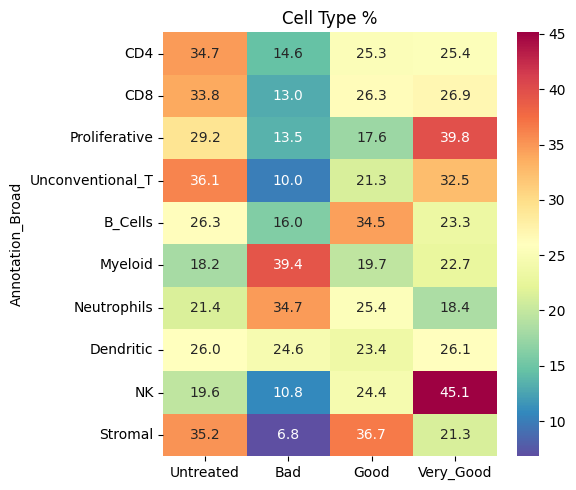

In [25]:

celltype_col = 'Annotation_Broad'
sample_col = 'sample_state'
condition_col = 'Response'  # Or 'sample_state'

adata_ =adata#[adata.obs['Treatment'].isin(['NMDi'])]
adata_.obs['Treatment']= adata_.obs['Treatment'].tolist()
# Step 1: Cross-tab counts per (celltype x sample)
ct_sample = pd.crosstab(adata_.obs[celltype_col], adata.obs[sample_col])

# Step 2: Normalize *within each sample* (column-wise) → celltype percentages per sample
ct_sample_pct = ct_sample.div(ct_sample.sum(axis=0), axis=1) * 100

# Step 3: Map each sample to its condition
sample_to_condition = adata_.obs[[sample_col, condition_col]].drop_duplicates().set_index(sample_col)[condition_col]

# Step 4: Replace sample columns with condition labels
ct_sample_pct.columns = sample_to_condition[ct_sample_pct.columns].values

# Step 5: Group columns by condition, take the mean across samples per condition
ct_condition_pct = ct_sample_pct.groupby(axis=1, level=0).mean()

# Step 6: Normalize each row (i.e., per cell type) so the condition percentages sum to 100%
ct_condition_pct_norm = ct_condition_pct.div(ct_condition_pct.sum(axis=1), axis=0) * 100

# Step 7: Plot
plt.figure(figsize=(6, 5))
sns.heatmap(ct_condition_pct_norm, annot=True, fmt=".1f", cmap="Spectral_r")
# plt.ylabel("Cell Type")
# plt.xlabel("Condition")
plt.title("Cell Type %")
plt.tight_layout()
plt.savefig(f'../../figures/Paper/Percentage_CellType_Distribution_by_{condition_col}_NMDi_SUBSET.png', dpi=400, bbox_inches='tight')
plt.show()


In [22]:
adata.obs['clone_id'] = adata.obs['TCR_clone_id']
adata = adata[adata.obs['Annotation'].isin(cell_groups["CD4"]+cell_groups["CD8"] + cell_groups['Proliferative'])]
adata
adata.obs['Annotation_Broad'] = 'CD8'
adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["CD4"]),'Annotation_Broad'] = 'CD4'
adata.obs.loc[adata.obs['Annotation'].isin(cell_groups["Proliferative"]),'Annotation_Broad'] = 'Proliferative'
adata = adata[~adata.obs['clone_id'].isna()]


/tmp/ipykernel_30858/2228245145.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Annotation_Broad'] = 'CD8'


In [30]:
# Extract relevant metadata
df = adata.obs[['clone_id', 'sample_barcode']].copy()

# Drop NAs
df = df.dropna(subset=['clone_id', 'sample_barcode'])

# Step 1: Count number of cells per (sample, clone)
sample_clone_counts = df.groupby(['sample_barcode', 'clone_id']).size().reset_index(name='count')

sample_clone_counts = sample_clone_counts[sample_clone_counts['count']!=0]
# Step 2: Total number of cells per sample
sample_totals = sample_clone_counts.groupby('sample_barcode')['count'].sum().reset_index(name='total_cells')


# Step 3: Merge to compute % of each clone per sample
sample_clone_pct = pd.merge(sample_clone_counts, sample_totals, on='sample_barcode')
sample_clone_pct['percent'] = (sample_clone_pct['count'] / sample_clone_pct['total_cells']) * 100


sample_clone_pct.index = [sample_clone_pct.loc[i,'sample_barcode']+'_'+str(sample_clone_pct.loc[i,'clone_id']) for i in sample_clone_pct.index]
adata.obs['Sample_clone'] = [adata.obs.loc[i,'sample_barcode']+'_'+ str(adata.obs.loc[i,'clone_id']) for i in adata.obs.index]
adata.obs['clone_expansion_percent']= [sample_clone_pct.loc[adata.obs.loc[i,'Sample_clone'],'percent'] for i in adata.obs.index]
sample_clone_counts = df.groupby(['sample_barcode', 'clone_id']).size().reset_index(name='count')
sample_clone_counts[sample_clone_counts['count']!=0]
bins = [-1,0.001, 0.01, 0.05, 0.1, 0.2, 1.0]  # Note: -1 to include 0%, 1.0 for max
labels = [
    '<0.001', 
    '0.001–0.01', 
    '0.01–0.05', 
    '0.05–0.1', 
    '0.1–0.2', 
    '>0.2'
]

# Create the binned category
adata.obs['clonal_expansion_percent'] = pd.cut(
    adata.obs['clone_expansion_percent'] / 100,  # convert % to fraction if needed
    bins=bins,
    labels=labels,
    include_lowest=True
)
adata.obs['clonal_expansion_percent'] = adata.obs['clonal_expansion_percent'].cat.set_categories([
    '<0.001','0.001–0.01', '0.01–0.05', '0.05–0.1', '0.1–0.2', '>0.2'
], ordered=True)

/tmp/ipykernel_6112/3424888801.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_clone_counts = df.groupby(['sample_barcode', 'clone_id']).size().reset_index(name='count')
/tmp/ipykernel_6112/3424888801.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_totals = sample_clone_counts.groupby('sample_barcode')['count'].sum().reset_index(name='total_cells')
/tmp/ipykernel_6112/3424888801.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample_clone'] = [adata.obs.loc[i,'sample_barcode']+'_'+ str(adata.obs.loc[i,'clone_id']) 

In [31]:
adata

AnnData object with n_obs × n_vars = 19357 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id', 'Annotation_Broad', 'clone_id', 'Sample_clone', 'clone_expansion_pe

In [32]:
ir.tl.clonal_expansion(adata, breakpoints=(1,5,20,100))

In [33]:
adata.obs['Annotation'] = adata.obs['Annotation'].tolist()

In [34]:
color_meta = 'clonal_expansion'
expansion_palette = sns.color_palette("YlGnBu", len(adata.obs[color_meta].cat.categories))
color_dict = dict(zip(adata.obs[color_meta].cat.categories, expansion_palette))
color_dict

{'<= 1': (0.9101268742791234, 0.9649365628604383, 0.6956401384083045),
 '<= 5': (0.6984544405997694, 0.8818608227604767, 0.7138485198000769),
 '<= 20': (0.39601691657054977, 0.7660745866974241, 0.7481430219146482),
 '<= 100': (0.1729642445213379, 0.6295117262591311, 0.759523260284506),
 '> 100': (0.12764321414840446, 0.42666666666666664, 0.6861361014994233),
 'nan': (0.14357554786620533, 0.22523644752018454, 0.5905420991926182)}

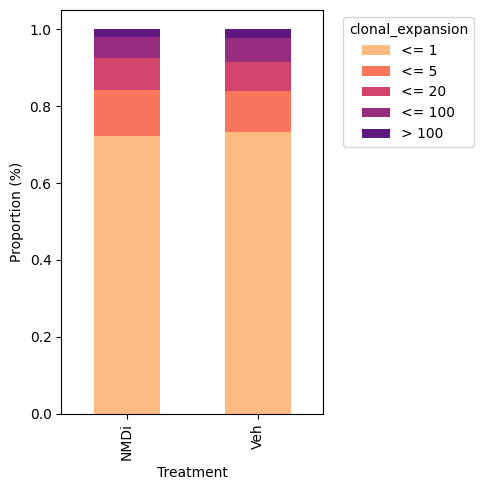

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_meta = 'Treatment'
color_meta = 'clonal_expansion'


# Define color palette for clone_expansion_category
expansion_palette = sns.color_palette("magma_r", len(adata.obs[color_meta].cat.categories))
color_dict = dict(zip(adata.obs[color_meta].cat.categories, expansion_palette))
# 1. Count of cells by Treatment and Annotation_Broad
count_df = pd.crosstab(adata.obs[x_meta], adata.obs[color_meta])

# 2. Proportions for relative barplot
proportion_df = count_df.div(count_df.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust size as needed

# Plot the stacked barplot
proportion_df.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[color_dict[col] for col in proportion_df.columns]
)

# Shared legend on the side
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    labels,
    title=color_meta,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Axis labels and layout
ax.set_ylabel("Proportion (%)")
ax.set_xlabel(x_meta)
plt.tight_layout()

# Save the figure
plt.savefig(f'../../figures/Paper/StackedBarplot_{x_meta}_{color_meta}.png', bbox_inches='tight', dpi=400)
plt.show()



/tmp/ipykernel_6112/3778590403.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_.obs['Treatment']= adata_.obs['Treatment'].tolist()


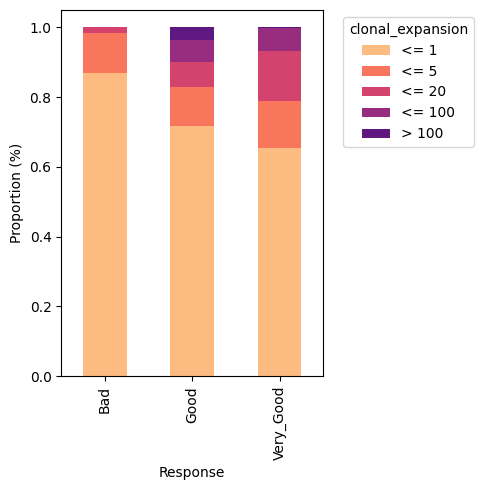

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_meta = 'Response'
color_meta = 'clonal_expansion'

adata_ =adata[adata.obs['Treatment'].isin(['NMDi'])]
adata_.obs['Treatment']= adata_.obs['Treatment'].tolist()

# Define color palette for clone_expansion_category
expansion_palette = sns.color_palette("magma_r", len(adata.obs[color_meta].cat.categories))
color_dict = dict(zip(adata_.obs[color_meta].cat.categories, expansion_palette))
# 1. Count of cells by Treatment and Annotation_Broad
count_df = pd.crosstab(adata_.obs[x_meta], adata_.obs[color_meta])

# 2. Proportions for relative barplot
proportion_df = count_df.div(count_df.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust size as needed

# Plot the stacked barplot
proportion_df.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[color_dict[col] for col in proportion_df.columns]
)

# Shared legend on the side
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    labels,
    title=color_meta,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Axis labels and layout
ax.set_ylabel("Proportion (%)")
ax.set_xlabel(x_meta)
plt.tight_layout()

# Save the figure
plt.savefig(f'../../figures/Paper/StackedBarplot_{x_meta}_{color_meta}.png', bbox_inches='tight', dpi=400)
plt.show()



/tmp/ipykernel_6112/3274569775.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_.obs
/tmp/ipykernel_6112/3274569775.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped['prop'] = grouped.groupby([group_by, x_meta])['count'].transform(lambda x: x / x.sum())
/tmp/ipykernel_6112/3274569775.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = grouped.pivot_table(


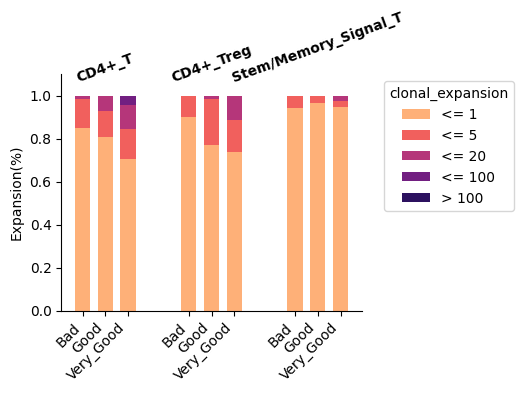

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_meta = 'Response'
color_meta = 'clonal_expansion'
group_by = 'Annotation'

# Filter and prep data
adata_ = adata[(adata.obs['Treatment'].isin(['NMDi']))&(adata.obs['Annotation_Broad'].isin(['CD4']))].copy()
adata_.obs['Treatment'] = adata_.obs['Treatment'].tolist()

# Define consistent colors
expansion_categories = adata_.obs[color_meta].cat.categories
expansion_palette = sns.color_palette("magma_r", len(expansion_categories))
color_dict = dict(zip(expansion_categories, expansion_palette))

# 1. Grouped count
grouped = (
    adata_.obs
    .groupby([group_by, x_meta, color_meta])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to proportions
grouped['prop'] = grouped.groupby([group_by, x_meta])['count'].transform(lambda x: x / x.sum())

# 3. Pivot to wide format
pivot_df = grouped.pivot_table(
    index=[group_by, x_meta],
    columns=color_meta,
    values='prop',
    fill_value=0
).reset_index()

# 4. Define x ticks: numerical index for spacing, grouped by annotation
annotations = pivot_df[group_by].unique().tolist()
responses = pivot_df[x_meta].unique().tolist()

# Build manual x-axis positions
x_locs = []
x_labels = []
annotation_centers = []

bar_width = 0.2
group_spacing = 0.5
group_width = len(responses) * bar_width

cur_x = 0
for annot in annotations:
    response_rows = pivot_df[pivot_df[group_by] == annot]
    for i, resp in enumerate(responses):
        x_locs.append(cur_x)
        x_labels.append(resp)
        cur_x += bar_width+0.1
    annotation_centers.append((x_locs[-len(responses)] + x_locs[-1]) / 2)
    cur_x += group_spacing  # space between annotation groups

# 5. Plot
plt.figure(figsize=(max(5, len(x_locs) * 0.6), 4))

# Initialize bottom heights to 0 for each bar
bottoms = [0] * len(x_locs)

# Iterate over categories to build each stack layer
for cat in expansion_categories:
    heights = []
    for annot in annotations:
        for resp in responses:
            row = pivot_df[(pivot_df[group_by] == annot) & (pivot_df[x_meta] == resp)]
            if not row.empty:
                val = row[cat].values[0]
            else:
                val = 0.0
            heights.append(val)

    # Plot this layer on top of the previous one
    plt.bar(x_locs, heights, bottom=bottoms, color=color_dict[cat], width=bar_width, label=cat)

    # Update bottoms for the next category
    bottoms = [b + h for b, h in zip(bottoms, heights)]

# 6. Annotations above groups
for i, annot in enumerate(annotations):
    plt.text(
        annotation_centers[i], 1.05, annot,
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        rotation=20
    )
# Remove frame (keep only x and y axes)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
# Axes and legend
plt.xticks(x_locs, x_labels, rotation=45, ha='right')
plt.ylabel("Expansion(%)")
plt.xlabel("")
plt.ylim(0, 1.1)
# plt.title("Clonal Expansion by Response, grouped by Annotation")
plt.legend(title=color_meta, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save
plt.savefig(f'../../figures/Paper/Grouped_StackedBarplot_{x_meta}_by_{group_by}_CD4.png', bbox_inches='tight', dpi=400)
plt.savefig(f'../../figures/Paper/Grouped_StackedBarplot_{x_meta}_by_{group_by}_CD4.pdf', bbox_inches='tight', dpi=400)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_meta = 'Response'
color_meta = 'clonal_expansion'
group_by = 'Annotation'

# Filter and prep data
adata_ = adata[(adata.obs['Treatment'].isin(['NMDi']))&(adata.obs['Annotation_Broad'].isin(['CD8']))].copy()

adata_.obs['Annotation'] = adata_.obs['Annotation'].cat.reorder_categories(['CD8+_HiRib_T','CD8+_(Pre)Exh_T','CD8+_(TPEX)Exh_T','CD8+_(Term)Exh_T','CD8+_Cyto_T'])

adata_.obs['Treatment'] = adata_.obs['Treatment'].tolist()

# Define consistent colors
expansion_categories = adata_.obs[color_meta].cat.categories
expansion_palette = sns.color_palette("magma_r", len(expansion_categories))
color_dict = dict(zip(expansion_categories, expansion_palette))

# 1. Grouped count
grouped = (
    adata_.obs
    .groupby([group_by, x_meta, color_meta])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to proportions
grouped['prop'] = grouped.groupby([group_by, x_meta])['count'].transform(lambda x: x / x.sum())

# 3. Pivot to wide format
pivot_df = grouped.pivot_table(
    index=[group_by, x_meta],
    columns=color_meta,
    values='prop',
    fill_value=0
).reset_index()

# 4. Define x ticks: numerical index for spacing, grouped by annotation
annotations = pivot_df[group_by].unique().tolist()
responses = pivot_df[x_meta].unique().tolist()

# Build manual x-axis positions
x_locs = []
x_labels = []
annotation_centers = []

bar_width = 0.2
group_spacing = 0.5
group_width = len(responses) * bar_width

cur_x = 0
for annot in annotations:
    response_rows = pivot_df[pivot_df[group_by] == annot]
    for i, resp in enumerate(responses):
        x_locs.append(cur_x)
        x_labels.append(resp)
        cur_x += bar_width+0.1
    annotation_centers.append((x_locs[-len(responses)] + x_locs[-1]) / 2)
    cur_x += group_spacing  # space between annotation groups

# 5. Plot
plt.figure(figsize=(max(5, len(x_locs) * 0.6), 4))

# Initialize bottom heights to 0 for each bar
bottoms = [0] * len(x_locs)

# Iterate over categories to build each stack layer
for cat in expansion_categories:
    heights = []
    for annot in annotations:
        for resp in responses:
            row = pivot_df[(pivot_df[group_by] == annot) & (pivot_df[x_meta] == resp)]
            if not row.empty:
                val = row[cat].values[0]
            else:
                val = 0.0
            heights.append(val)

    # Plot this layer on top of the previous one
    plt.bar(x_locs, heights, bottom=bottoms, color=color_dict[cat], width=bar_width, label=cat)

    # Update bottoms for the next category
    bottoms = [b + h for b, h in zip(bottoms, heights)]

# 6. Annotations above groups
for i, annot in enumerate(annotations):
    plt.text(
        annotation_centers[i], 1.05, annot,
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        rotation=20
    )
# Remove frame (keep only x and y axes)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
# Axes and legend
plt.xticks(x_locs, x_labels, rotation=45, ha='right')
plt.ylabel("Expansion(%)")
plt.xlabel("")
plt.ylim(0, 1.1)
# plt.title("Clonal Expansion by Response, grouped by Annotation")
plt.legend(title=color_meta, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save
plt.savefig(f'../../figures/Paper/Grouped_StackedBarplot_{x_meta}_by_{group_by}_CD8.png', bbox_inches='tight', dpi=400)
plt.savefig(f'../../figures/Paper/Grouped_StackedBarplot_{x_meta}_by_{group_by}_CD8.pdf', bbox_inches='tight', dpi=400)

plt.show()


/tmp/ipykernel_5666/2829565966.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_.obs
/tmp/ipykernel_5666/2829565966.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped['prop'] = grouped.groupby([group_by, x_meta])['count'].transform(lambda x: x / x.sum())
/tmp/ipykernel_5666/2829565966.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = grouped.pivot_table(


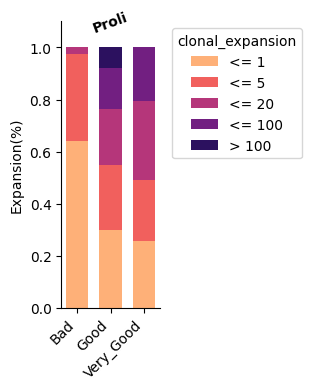

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_meta = 'Response'
color_meta = 'clonal_expansion'
group_by = 'Annotation'

# Filter and prep data
adata_ = adata[(adata.obs['Treatment'].isin(['NMDi']))&(adata.obs['Annotation_Broad'].isin(['Proliferative']))].copy()


adata_.obs['Treatment'] = adata_.obs['Treatment'].tolist()

# Define consistent colors
expansion_categories = adata_.obs[color_meta].cat.categories
expansion_palette = sns.color_palette("magma_r", len(expansion_categories))
color_dict = dict(zip(expansion_categories, expansion_palette))

# 1. Grouped count
grouped = (
    adata_.obs
    .groupby([group_by, x_meta, color_meta])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to proportions
grouped['prop'] = grouped.groupby([group_by, x_meta])['count'].transform(lambda x: x / x.sum())

# 3. Pivot to wide format
pivot_df = grouped.pivot_table(
    index=[group_by, x_meta],
    columns=color_meta,
    values='prop',
    fill_value=0
).reset_index()

# 4. Define x ticks: numerical index for spacing, grouped by annotation
annotations = pivot_df[group_by].unique().tolist()
responses = pivot_df[x_meta].unique().tolist()

# Build manual x-axis positions
x_locs = []
x_labels = []
annotation_centers = []

bar_width = 0.2
group_spacing = 0.5
group_width = len(responses) * bar_width

cur_x = 0
for annot in annotations:
    response_rows = pivot_df[pivot_df[group_by] == annot]
    for i, resp in enumerate(responses):
        x_locs.append(cur_x)
        x_labels.append(resp)
        cur_x += bar_width+0.1
    annotation_centers.append((x_locs[-len(responses)] + x_locs[-1]) / 2)
    cur_x += group_spacing  # space between annotation groups

# 5. Plot
plt.figure(figsize=(max(2, len(x_locs) * 1.1), 4))

# Initialize bottom heights to 0 for each bar
bottoms = [0] * len(x_locs)

# Iterate over categories to build each stack layer
for cat in expansion_categories:
    heights = []
    for annot in annotations:
        for resp in responses:
            row = pivot_df[(pivot_df[group_by] == annot) & (pivot_df[x_meta] == resp)]
            if not row.empty:
                val = row[cat].values[0]
            else:
                val = 0.0
            heights.append(val)

    # Plot this layer on top of the previous one
    plt.bar(x_locs, heights, bottom=bottoms, color=color_dict[cat], width=bar_width, label=cat)

    # Update bottoms for the next category
    bottoms = [b + h for b, h in zip(bottoms, heights)]

# 6. Annotations above groups
for i, annot in enumerate(annotations):
    plt.text(
        annotation_centers[i], 1.05, annot,
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        rotation=20
    )
# Remove frame (keep only x and y axes)
ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
# Axes and legend
plt.xticks(x_locs, x_labels, rotation=45, ha='right')
plt.ylabel("Expansion(%)")
plt.xlabel("")
plt.ylim(0, 1.1)
# plt.title("Clonal Expansion by Response, grouped by Annotation")
plt.legend(title=color_meta, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save
plt.savefig(f'../../figures/Paper/Grouped_StackedBarplot_{x_meta}_by_{group_by}_proli.png', bbox_inches='tight', dpi=400)
plt.savefig(f'../../figures/Paper/Grouped_StackedBarplot_{x_meta}_by_{group_by}_proli.pdf', bbox_inches='tight', dpi=400)

plt.show()


# DE exparession

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(

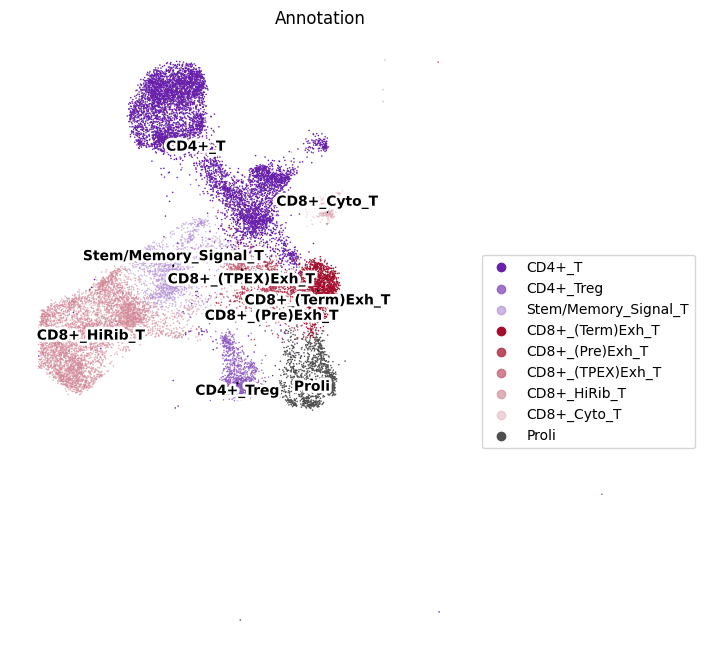

In [16]:

umap_df = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
umap_df['cluster'] = adata.obs['Annotation'].values


rcParams['figure.figsize'] = (8,8)

ax = sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,
    size=0,ncols=2, vmax='p99', show=False, frameon=False, palette=cell_colors
)

legend = ax.get_legend()
if legend:
    # Modify legend properties
    handles, labels = ax.get_legend_handles_labels()

    # Customize the legend: position, columns, and title
    legend = ax.legend(
        handles, labels,
        loc='upper left',        # Position: 'upper left', 'lower right', etc.
        bbox_to_anchor=(0.75, 0.65),# Fine-tune position outside plot
        ncol=1,                  # Number of columns
        fontsize=10
    )

sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,
    size=5,ncols=2, vmax='p99',ax=ax, show=False, frameon=False, legend_loc=None, legend_fontoutline=1.5, legend_fontsize=6
)

import matplotlib.patheffects as path_effects
from adjustText import adjust_text
texts = []

for group, coords in umap_df.groupby('cluster')[['UMAP1', 'UMAP2']].median().iterrows():
    text = plt.text(
        coords['UMAP1'], coords['UMAP2'],
        str(group),
        fontsize=10, color='Black', weight='bold',ha='center', va='center'
    )
    text.set_path_effects([
        path_effects.Stroke(linewidth=4, foreground='white'),
        path_effects.Normal()
    ])
    texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), only_move='y')

plt.savefig('../../figures/Paper/Umap_Ann_T_Cells.png', bbox_inches='tight', dpi=400)
plt.savefig('../../figures/Paper/Umap_Ann_T_Cells.pdf', bbox_inches='tight', dpi=400)


In [15]:
adata

AnnData object with n_obs × n_vars = 19357 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id', 'Annotation_Broad', 'clone_id'
    var: 'mt', 'ribo', 'hb', 'n_cell

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


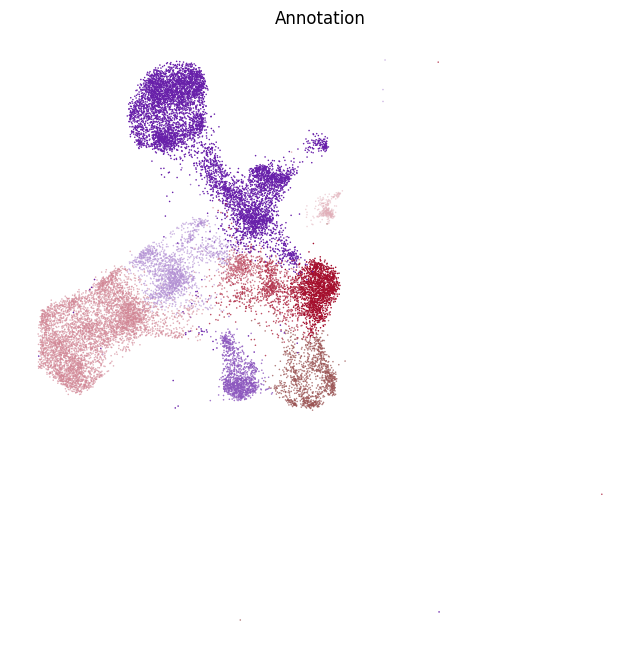

In [ ]:

umap_df = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
umap_df['cluster'] = adata.obs['Annotation'].values


rcParams['figure.figsize'] = (8,8)


sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,
    size=5,ncols=2, vmax='p99', show=False, frameon=False, legend_loc=None, legend_fontoutline=1.5, legend_fontsize=6
)

plt.savefig('../../figures/Paper/Umap_Ann_T_Cells_No_Legend.png', bbox_inches='tight', dpi=400)
plt.savefig('../../figures/Paper/Umap_Ann_T_Cells_No_Legend.pdf', bbox_inches='tight', dpi=400)


In [ ]:
import matplotlib.cm as cm
expansion_color_map = sns.color_palette("magma_r", len(adata.obs[color_meta].cat.categories))

In [ ]:
expansion_color_map

{'<= 1': (1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
 '<= 5': (0.9913725490196079, 0.7913725490196079, 0.7082352941176471, 1.0),
 '<= 20': (0.9874509803921568, 0.5411764705882353, 0.41568627450980394, 1.0),
 '<= 50': (0.9466666666666667, 0.2682352941176469, 0.19607843137254893, 1.0),
 '<= 100': (0.7364705882352941, 0.08, 0.10117647058823528, 1.0),
 '> 100': (0.403921568627451, 0.0, 0.05098039215686274, 1.0)}

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


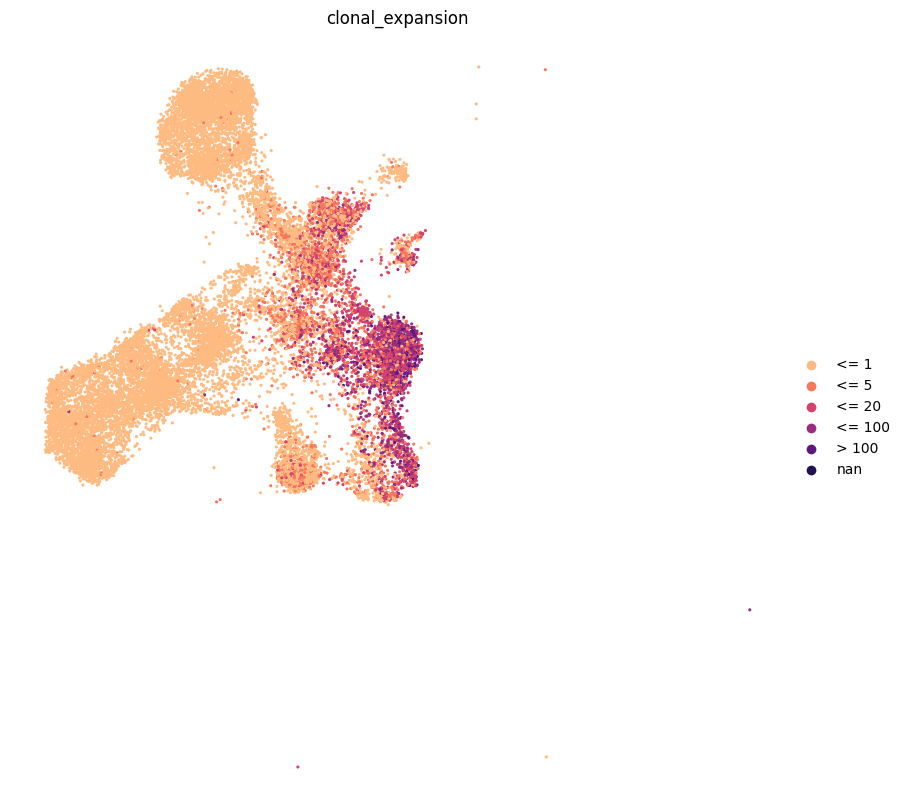

In [ ]:
sc.pl.umap(
    adata,
    color=['clonal_expansion'],
    # increase horizontal space between panels
    wspace=0.5,
    size=20,ncols=2, vmax='p99', show=False, frameon=False,  legend_fontoutline=2.5, legend_fontsize=10,palette=expansion_color_map
)
plt.savefig(f'../../figures/Paper/UMAP_T_expansion_cats', bbox_inches='tight', dpi=400)


In [ ]:
rcParams['figure.figsize'] = (4,4)


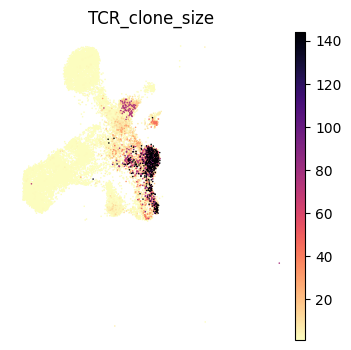

In [ ]:
sc.pl.umap(
    adata,
    color=['TCR_clone_size'],
    # increase horizontal space between panels
    wspace=0.5,
    size=5,ncols=2, vmax='p99', show=False, frameon=False,  legend_fontoutline=2.5, legend_fontsize=10,cmap='magma_r'
)
plt.savefig(f'../../figures/Paper/UMAP_T_expansion_cont_magma.pdf', bbox_inches='tight', dpi=400)
plt.savefig(f'../../figures/Paper/UMAP_T_expansion_cont_magma.png', bbox_inches='tight', dpi=400)


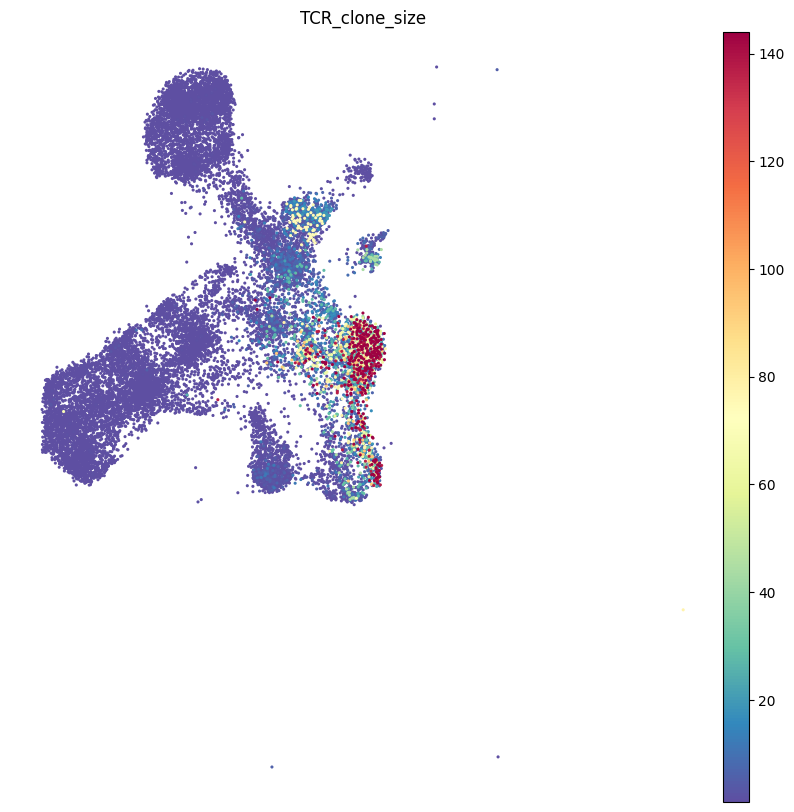

In [ ]:
sc.pl.umap(
    adata,
    color=['TCR_clone_size'],
    # increase horizontal space between panels
    wspace=0.5,
    size=20,ncols=2, vmax='p99', show=False, frameon=False,  legend_fontoutline=2.5, legend_fontsize=10,cmap='Spectral_r'
)
plt.savefig(f'../../figures/Paper/UMAP_T_expansion_cont_spectral.png', bbox_inches='tight', dpi=400)


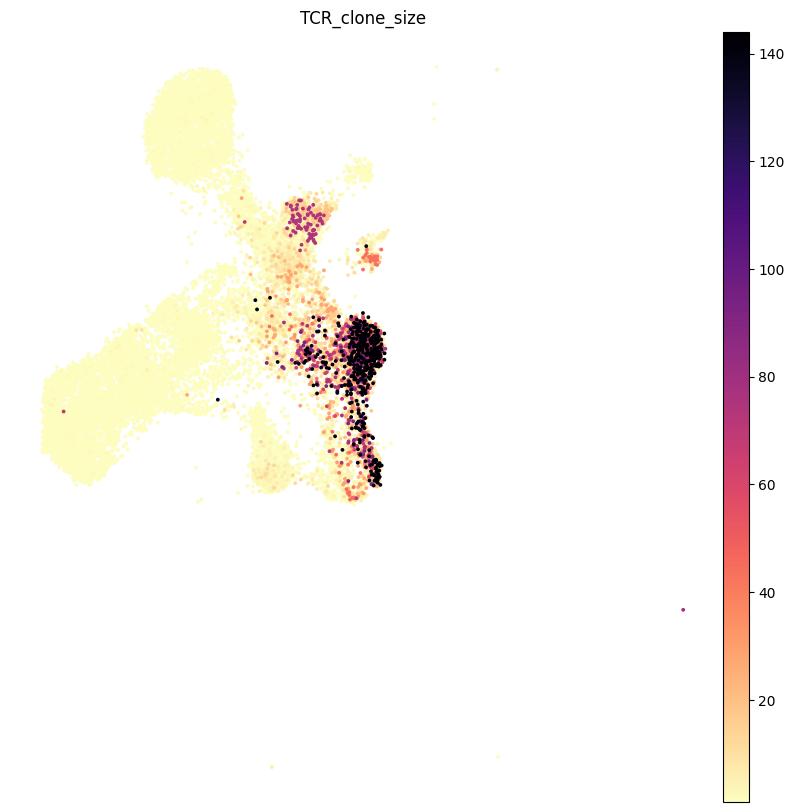

In [ ]:
sc.pl.umap(
    adata,
    color=['TCR_clone_size'],
    # increase horizontal space between panels
    wspace=0.5,
    size=30,ncols=2, vmax='p99', show=False, frameon=False,  legend_fontoutline=2.5, legend_fontsize=10,cmap='magma_r'
)
plt.savefig(f'../../figures/Paper/UMAP_T_expansion_cont_magma.png', bbox_inches='tight', dpi=400)
plt.savefig(f'../../figures/Paper/UMAP_T_expansion_cont_magma.pdf', bbox_inches='tight', dpi=400)


/tmp/ipykernel_5666/2237966568.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


Processing: Bad vs Good
Processing: Bad vs Very_Good
Processing: Good vs Very_Good


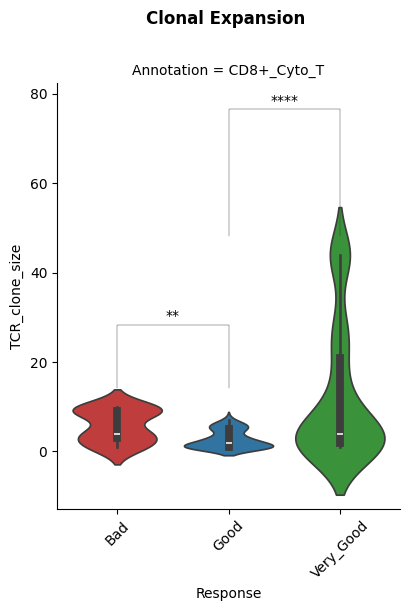

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from statannotations.Annotator import Annotator

# Settings
ann = 'Annotation'
split_by = 'Response'

# Extract and prepare DataFrame
df = adata[adata.obs['Annotation'].isin(['CD8+_Cyto_T'])&(~adata.obs['Response'].isin(['Untreated']))].obs[[ann, 'TCR_clone_size', split_by, 'sample_state']].copy()
df['TCR_clone_size'] = pd.to_numeric(df['TCR_clone_size'], errors='coerce')
df = df.dropna(subset=['TCR_clone_size', split_by, ann])

# Get all 2-category combinations from split_by
unique_categories = sorted(df[split_by].dropna().cat.categories)
category_combinations = list(combinations(unique_categories, 2))

# Define global pastel color palette for all categories
all_palette =palette_response


# Create violin plots per annotation
g = sns.catplot(
    data=df,
    kind='violin',
    x=split_by,
    y='TCR_clone_size',
    col=ann,
    col_wrap=1,
    height=6,
    aspect=0.7,
    sharey=False,
    dodge=False,
    palette=all_palette,
    legend=False,
)

# Adjust legend

m=2
# Plot per combination
for cat1, cat2 in category_combinations:
    # Subset data to this 2v2 comparison
    sub_df = df[df[split_by].isin([cat1, cat2])].copy()

    # Define local palette for this pair
    palette = {cat1: all_palette[cat1], cat2: all_palette[cat2]}

    pair_label = f"{cat1} vs {cat2}"
    print(f"Processing: {pair_label}")

    # Add statistical annotations
    
    for n, ax, annotation in zip(range(len(g.axes.flat)),g.axes.flat, sub_df[ann].unique()):
        subset = sub_df[sub_df[ann] == annotation]
        pairs = [(cat1, cat2)]
        annotator = Annotator(ax, pairs, data=subset, x=split_by, y='TCR_clone_size', palette=palette)
        annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=0, line_height=m*0.1, line_width=0.3, hide_non_significant=True)
        try:
            annotator.apply_and_annotate()
        except Exception as e:
            print(f"Skipping {annotation} due to error: {e}")
    m += 1

# g.fig.subplots_adjust(right=0.75)
# handles = [plt.Line2D([0], [0], color=palette_response[t], lw=10) for t in unique_categories]
# g.fig.legend(
#     handles,
#     unique_categories,
#     title=split_by,
#     loc='center left',
#     bbox_to_anchor=(1.01, 0.5),
#     frameon=False
# )
# Final touches
g.set_xticklabels(rotation=45)
g.fig.suptitle(f"Clonal Expansion", y=1.01, x =0.55, weight='bold')
plt.tight_layout()
plt.savefig(f'../../figures/Paper/Expansion_Violin_{ann}_{split_by}_TREATED.png', bbox_inches='tight', dpi=400)
plt.show()